In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
m = 100

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

[0, 2, 0, 12]

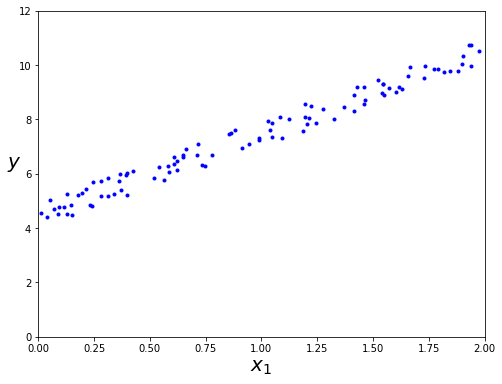

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.axis([0, 2, 0, 12])

In [4]:
X_b = np.c_[np.ones((m, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

[0, 2, 0, 12]

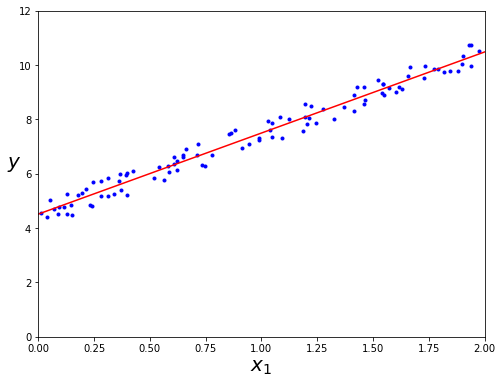

In [6]:
plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.axis([0, 2, 0, 12])

In [7]:
eta = 0.1
n_iterations = 1000
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[ 4.51359766],
       [ 2.98323418]])

In [8]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, n_iterations=1000, theta_path=None, n_iterations_to_draw=10):
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if iteration < n_iterations_to_draw:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
    return theta

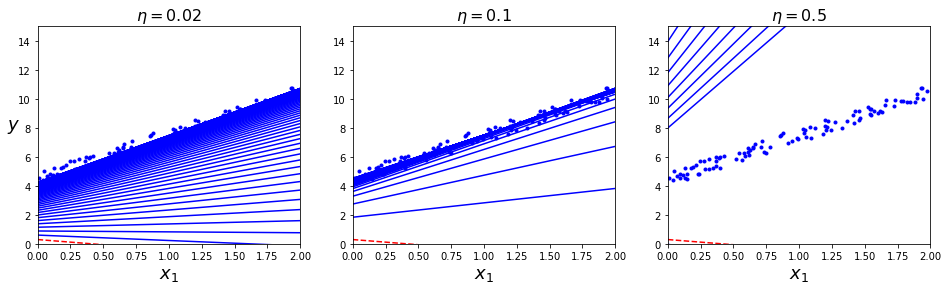

In [9]:
theta = np.random.randn(2,1)
n_iterations = 1000
n_iterations_to_draw = max(10, min(n_iterations / 10, 100))

plt.figure(figsize=(16,4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02, n_iterations=n_iterations, n_iterations_to_draw=n_iterations_to_draw)

plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, n_iterations=n_iterations, theta_path=theta_path_bgd, 
                      n_iterations_to_draw=n_iterations_to_draw)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5, n_iterations=n_iterations, n_iterations_to_draw=n_iterations_to_draw)

plt.show()

In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

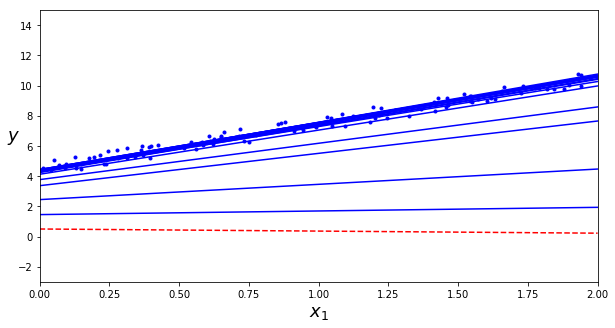

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,5))

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -3, 15])
plt.show()

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

c:\users\yithi_000\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [13]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[ 4.52036405] [ 2.99222868]


# POLYNOMINAL REGRESSION

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

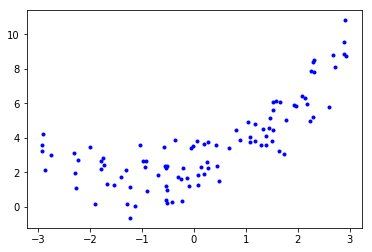

In [15]:
plt.plot(X, y, "b.")

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[ 1.97322766]


array([ 1.97322766,  3.89362739])

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

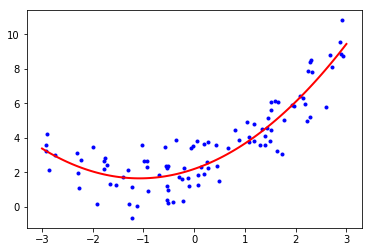

In [18]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2)

In [19]:
%load_ext autoreload
%autoreload 2

from mllib.plot.metrics import plot_learning_curves

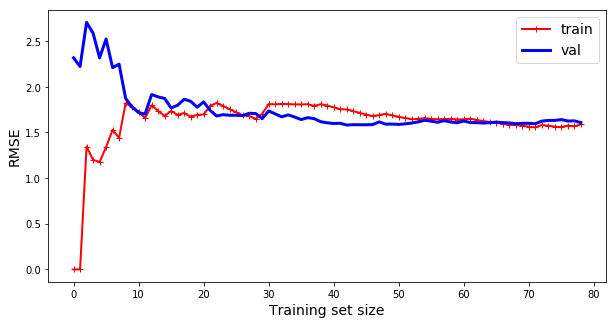

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

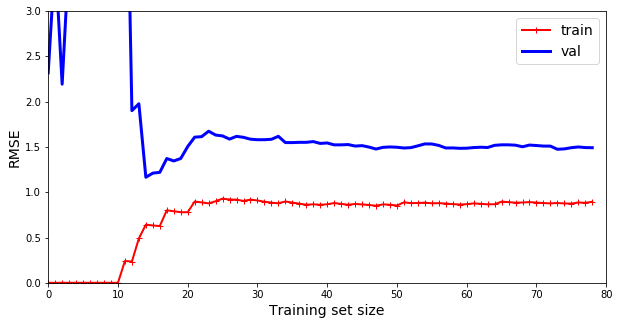

In [24]:
from sklearn.pipeline import make_pipeline

polynominal_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

plot_learning_curves(polynominal_regression, X, y, axis=[0, 80, 0, 3])